In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import json

## Load the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from google.colab import files
uploaded = files.upload()

Saving updated_X_recommend.pkl to updated_X_recommend.pkl
Saving updated_X_test.pkl to updated_X_test.pkl
Saving updated_X_train.pkl to updated_X_train.pkl
Saving updated_y_test.pkl to updated_y_test.pkl
Saving updated_y_train.pkl to updated_y_train.pkl


In [7]:
# Load the data
X_train = pd.read_pickle('updated_X_train.pkl')
y_train = pd.read_pickle('updated_y_train.pkl')
X_test = pd.read_pickle('updated_X_test.pkl')
y_test = pd.read_pickle('updated_y_test.pkl')
X_recommend = pd.read_pickle('updated_X_recommend.pkl')

In [8]:
X_train.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,genre_modern indie pop,genre_modern rock,genre_nashville indie,genre_new romantic,genre_nz folk,genre_permanent wave,genre_pop,genre_pop punk,genre_pop rock,genre_shimmer pop
5430,175093.0,0.143,0.2690,10.0,-17.614,1.0,0.0351,0.290,0.859000,0.152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1349,141062.0,0.106,0.0202,8.0,-32.719,1.0,0.0430,0.799,0.769000,0.109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1754,210253.0,0.417,0.6890,2.0,-8.302,0.0,0.1780,0.575,0.000000,0.496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7103,333329.0,0.499,0.5830,9.0,-6.628,0.0,0.2100,0.227,0.000000,0.103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4726,168854.0,0.828,0.3330,4.0,-10.351,0.0,0.0332,0.732,0.000526,0.117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Hyperparameter Tuning

We will tune for:
- Function to measure the quality of a split (criterion)
- The strategy used to choose the split at each node (splitter)
- The maximum depth of the tree (max_depth)
- The minimum number of samples required to be at a leaf node (min_samples_leaf)

In [9]:
# Check accuracy for each value for each hyperparameter in its range
# We will use GridSearchCV to automate this process

criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_depth = [2, 3, 5, 10, 20]
min_samples_leaf = [5, 10, 20, 50, 100]


#Convert to dictionary
hyperparameters = dict(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_leaf=min_samples_leaf)

print(hyperparameters)

{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100]}


In [10]:
# estimator = ML model to be tested
# param_grid = dictionary of hyperparameters to be tested
# n_jobs = number of cores to be used in parallel, -1 means use all
# cv = number of cross validation set elements
# verbose = setting it to 2 will print updates to the terminal

best_model = GridSearchCV(estimator=DecisionTreeClassifier(),
                         param_grid=hyperparameters,
                         n_jobs=-1,
                         cv=10,
                         verbose=2)

# Fit the model
best_model = best_model.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [11]:
criterion = best_model.best_estimator_.get_params()['criterion']
splitter = best_model.best_estimator_.get_params()['splitter']
max_depth = best_model.best_estimator_.get_params()['max_depth']
min_samples_leaf = best_model.best_estimator_.get_params()['min_samples_leaf']

print(f'Best criterion: {criterion}')
print(f'Best splitter: {splitter}')
print(f'Best max_depth: {max_depth}')
print(f'Best min_samples_leaf: {min_samples_leaf}')

Best criterion: gini
Best splitter: random
Best max_depth: 5
Best min_samples_leaf: 5


# Model

In [12]:
# model
decision_tree = DecisionTreeClassifier(criterion=criterion,
                                       splitter=splitter,
                                       max_depth=max_depth,
                                       min_samples_leaf=min_samples_leaf)

# fit the model
decision_tree.fit(X_train, y_train)

# prediction
predictions = decision_tree.predict(X_test)

## Visualize results

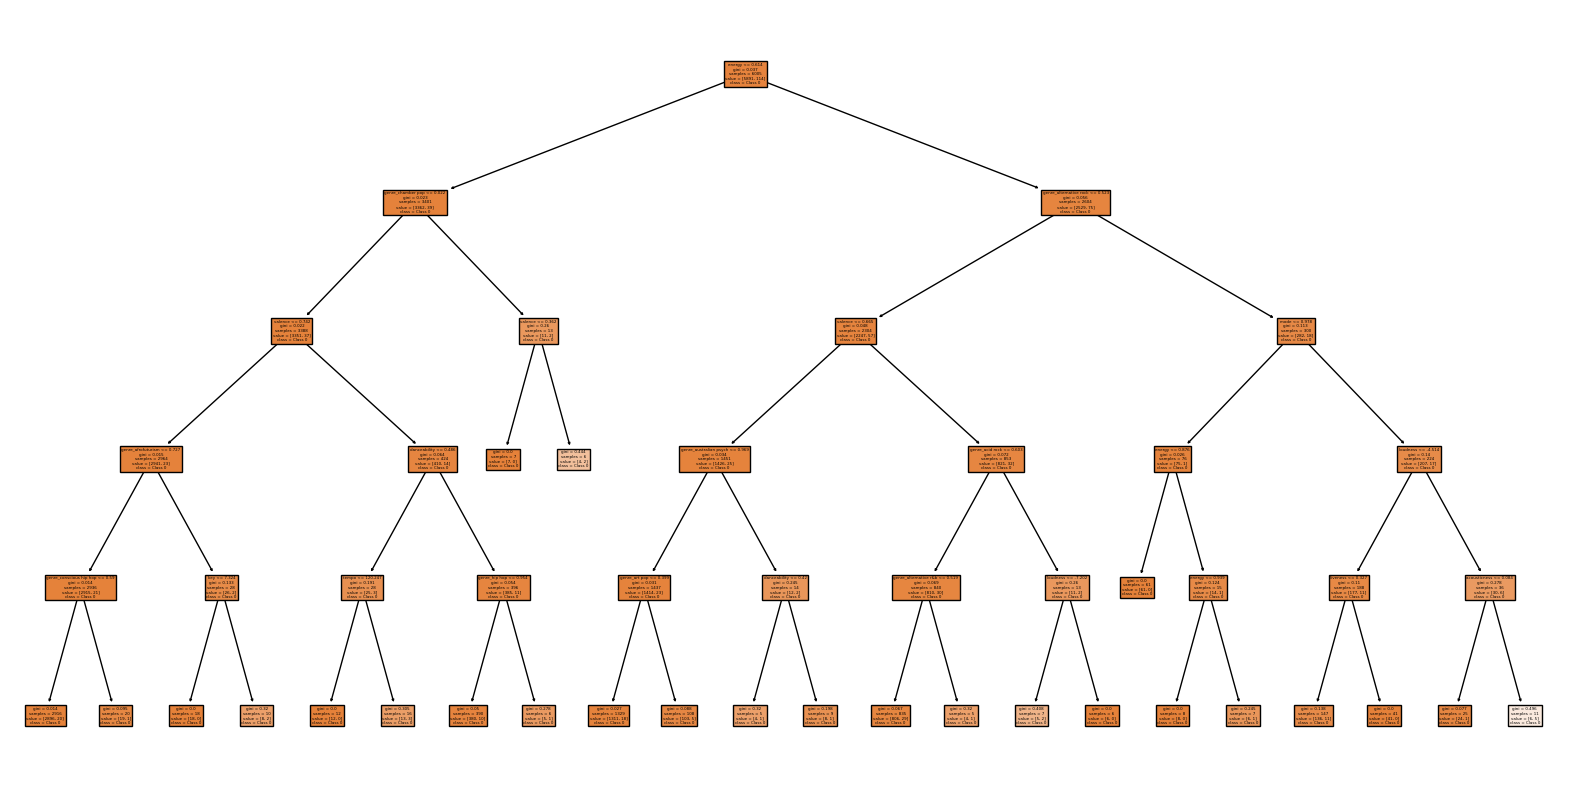

In [13]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'])
plt.show()

In [ ]:
from sklearn.tree import export_text

# Extract the decision rules from the decision tree
tree_rules = export_text(decision_tree, feature_names=list(X_train.columns))

# Print the decision rules
print(tree_rules)

|--- valence <= 0.54
|   |--- loudness <= -8.50
|   |   |--- danceability <= 0.36
|   |   |   |--- valence <= 0.17
|   |   |   |   |--- u <= 0.38
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- u >  0.38
|   |   |   |   |   |--- e <= 0.68
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- e >  0.68
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- valence >  0.17
|   |   |   |   |--- danceability <= 0.20
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- danceability >  0.20
|   |   |   |   |   |--- r <= 0.88
|   |   |   |   |   |   |--- o <= 0.65
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- o >  0.65
|   |   |   |   |   |   |   |--- p <= 0.35
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- p >  0.35
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- r >  0.88
|   |   |   |   |   |   |--- class: 0
|   |   |--- danceability >  0.36
|   |   |   |--- & <= 0.65
|   |   |   |   |--- t <=

In [ ]:
# Print and format the decision rules
print("Decision Rules:")
print("================")
for rule in tree_rules.split('\n'):
    print(rule)

Decision Rules:
|--- valence <= 0.54
|   |--- loudness <= -8.50
|   |   |--- danceability <= 0.36
|   |   |   |--- valence <= 0.17
|   |   |   |   |--- u <= 0.38
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- u >  0.38
|   |   |   |   |   |--- e <= 0.68
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- e >  0.68
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- valence >  0.17
|   |   |   |   |--- danceability <= 0.20
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- danceability >  0.20
|   |   |   |   |   |--- r <= 0.88
|   |   |   |   |   |   |--- o <= 0.65
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- o >  0.65
|   |   |   |   |   |   |   |--- p <= 0.35
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- p >  0.35
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- r >  0.88
|   |   |   |   |   |   |--- class: 0
|   |   |--- danceability >  0.36
|   |   |   |--- & <= 0.65
|   |   |

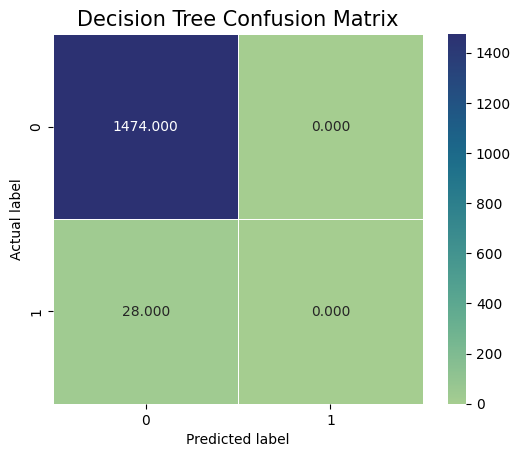

In [14]:
cm = confusion_matrix(y_test, predictions)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'crest');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Decision Tree Confusion Matrix', size = 15);
plt.show()

In [15]:

precision_macro_average = precision_score(y_test, predictions, average='macro')
precision_weighted_average = precision_score(y_test, predictions, average='weighted')

recall_macro_average = recall_score(y_test, predictions, average='macro')
recall_weighted_average = recall_score(y_test, predictions, average='weighted')

f1_macro_average = f1_score(y_test, predictions, average='macro')
f1_weighted_average = f1_score(y_test, predictions, average='weighted')


print(f'Precision (macro average)--> {round(precision_macro_average*100, 2)}%')
print(f'Precision (weighted average)--> {round(precision_weighted_average*100, 2)}%')

print(f'Recall (macro average)--> {round(recall_macro_average*100, 2)}%')
print(f'Recall (weighted average)--> {round(recall_weighted_average*100, 2)}%')

print(f'F1 score (macro average)--> {round(f1_macro_average*100, 2)}%')
print(f'F1 score (weighted average)--> {round(f1_weighted_average*100, 2)}%')

Precision (macro average)--> 49.07%
Precision (weighted average)--> 96.31%
Recall (macro average)--> 50.0%
Recall (weighted average)--> 98.14%
F1 score (macro average)--> 49.53%
F1 score (weighted average)--> 97.21%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1474
           1       0.00      0.00      0.00        28

    accuracy                           0.98      1502
   macro avg       0.49      0.50      0.50      1502
weighted avg       0.96      0.98      0.97      1502



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# File path on Google Drive
file_path = "/content/drive/MyDrive/year 29/Data Science /notebooks/spotify/model/f1_scores.json"

# Serialize f1 scores into a json file for later comparison between all models
model_name = "updated_decision_tree"
entry = {"f1_macro_average":f1_macro_average, "f1_weighted_average":f1_weighted_average}


with open(file_path, "r") as file:
    data = json.load(file)
data[model_name] = entry
with open(file_path, "w") as file:
    json.dump(data, file, indent=4)